# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse_study[mouse_study["Mouse ID"] != "g989"]
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = clean_mice.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_med = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_var = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

grouped_mice = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_med, "Tumor Volume Variance": tumor_var,
                            "Tumor Volume Std. Dev.": tumor_std, "Tumor Volume Std. Err.": tumor_sem})
grouped_mice

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary = clean_mice.groupby("Drug Regimen")
grouped_2 = summary.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
grouped_2 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

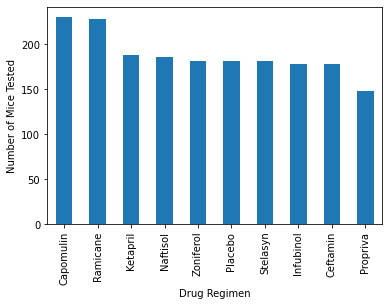

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_drugs = clean_mice["Drug Regimen"].value_counts()
count_drugs.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()

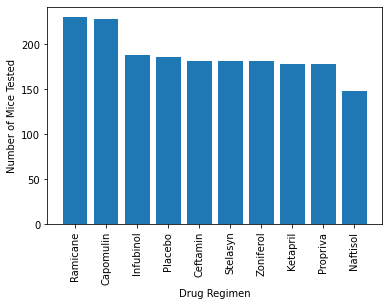

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = clean_mice["Drug Regimen"].unique()
plt.bar(drugs, count_drugs)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()

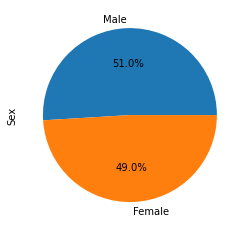

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_type = clean_mice["Sex"].value_counts()
sex_type.plot(kind="pie", autopct="%1.1f%%")
plt.show()

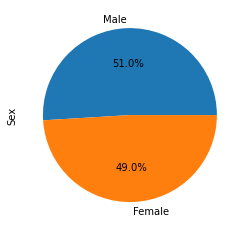

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_type, autopct="%1.1f%%", labels=["Male", "Female"])
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_mice.groupby(["Mouse ID"])["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mice = pd.merge(clean_mice, timepoint, on=["Mouse ID", "Timepoint"], how="right")
merged_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in drugs:
    volume = merged_mice.loc[merged_mice["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol.append(volume)

cap_tumor = tumor_vol[0]
ram_tumor = tumor_vol[1]
inf_tumor = tumor_vol[2]
cef_tumor = tumor_vol[3]
        
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

c_quartiles = cap_tumor.quantile([.25, .5, .75])
c_lowerq = c_quartiles[.25]
c_upperq = c_quartiles[.75]
c_iqr = c_upperq - c_lowerq    
c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
c_outliers = cap_tumor.loc[(cap_tumor < c_lower_bound) | (cap_tumor > c_upper_bound)]

r_quartiles = ram_tumor.quantile([.25, .5, .75])
r_lowerq = r_quartiles[.25]
r_upperq = r_quartiles[.75]
r_iqr = r_upperq - r_lowerq    
r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
r_outliers = ram_tumor.loc[(ram_tumor < r_lower_bound) | (ram_tumor > r_upper_bound)]

i_quartiles = inf_tumor.quantile([.25, .5, .75])
i_lowerq = i_quartiles[.25]
i_upperq = i_quartiles[.75]
i_iqr = i_upperq - i_lowerq    
i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
i_outliers = inf_tumor.loc[(inf_tumor < i_lower_bound) | (inf_tumor > i_upper_bound)]

e_quartiles = cef_tumor.quantile([.25, .5, .75])
e_lowerq = e_quartiles[.25]
e_upperq = e_quartiles[.75]
e_iqr = e_upperq - e_lowerq    
e_lower_bound = e_lowerq - (1.5*e_iqr)
e_upper_bound = e_upperq + (1.5*e_iqr)
e_outliers = cef_tumor.loc[(cef_tumor < e_lower_bound) | (cef_tumor > e_upper_bound)]

print(f"Capomulin's potential outliers: {c_outliers}")
print(f"Ramicane's potential outliers: {r_outliers}")
print(f"Infubinol's potential outliers: {i_outliers}")
print(f"Ceftamin's potential outliers: {e_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


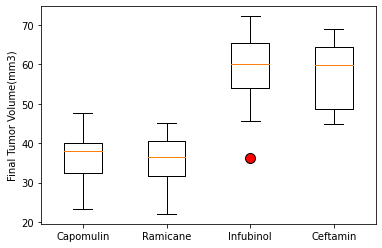

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.boxplot(tumor_vol, labels=drugs,  flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

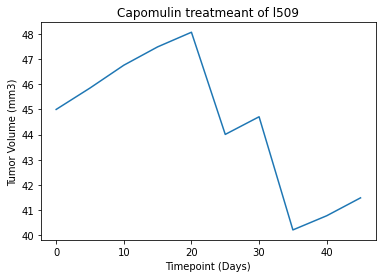

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_mice.loc[clean_mice["Drug Regimen"] == "Capomulin",:]
#using l509 from example 
l509 = capomulin.loc[capomulin["Mouse ID"] == "l509",:]
x_axis = l509["Timepoint"]
l509_tumor = l509["Tumor Volume (mm3)"]

plt.title("Capomulin treatmeant of l509")
plt.plot(x_axis, l509_tumor)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

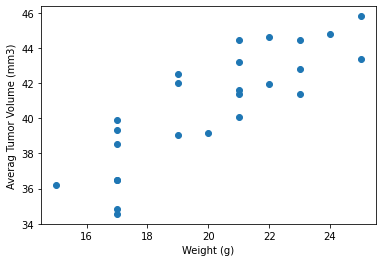

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average = capomulin.groupby(["Mouse ID"]).mean()
x_values = average["Weight (g)"]
y_values = average["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


In [20]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


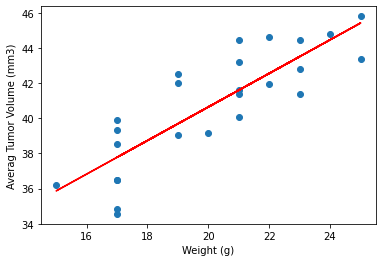

In [21]:
fig1, ax1 = plt.subplots()
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")
plt.plot(x_values,regress_values,"r-")
plt.show()